# Final analysis

To do:

- clean notebooks and code base
    - rename notebook to correlate with sections
    - make sure all code runs
    - add latex to repo
- compile into latex
- edit
- dwnominate citation
- table of hyperparameters for bilin model

### Notes:

- had to subset the data to 102 most popular
- model seems to preform worse with the most popular as the correlations drop, particularly with house republicans. Could be that more popular get a noisier signal because there are more followers? Maybe alpha isn't sufficient? 

In [61]:
library(ggplot2)

# Elite Graphs

### Bilin Elite estimates

In [133]:
load('bilinresults-elites-US.rdata')
load("Barbera/elites-data.Rdata")
us <- elites.data$US

rm(d)
results$merge <- tolower(results$screen_name)
# merging data
d <- merge(us, results, by="merge")

# normalizing elite estimates
# he is normalizing on the mass ideal point estimates. I can't do that so I'll use non-normalized as a comparison
# load("output/estimates-US.rdata") 
#d$phi <- (d$phi - mean(results$theta)) / sd(results$theta)

## keeping only congress
d <- d[d$title %in% c("House", "Senate"),]

# number of observations
sum(table(d$title[!is.na(d$dw.nom.1)]))

# correlations within chamber
cor(d$phi[d$title=="House"], d$dw.nom.1[d$title=="House"], use='complete.obs')
cor(d$phi[d$title=="Senate"], d$dw.nom.1[d$title=="Senate"], use='complete.obs')
# correlations within the party
cor(d$phi[d$party=="R"], d$dw.nom.1[d$party=="R"], use='complete.obs')
cor(d$phi[d$party=="D"], d$dw.nom.1[d$party=="D"], use='complete.obs')

[1] 102

[1] 0.9081914

[1] 0.9342882

[1] 0.3973357

[1] 0.496886

Warning message:
“`show_guide` has been deprecated. Please use `show.legend` instead.”


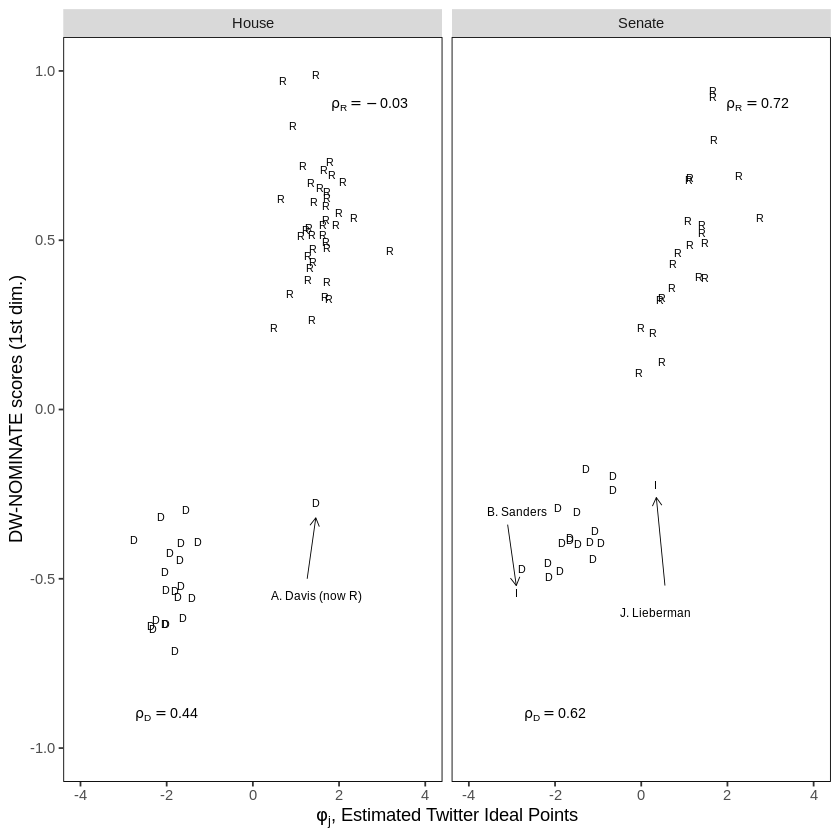

In [134]:
d <- d[!is.na(d$phi) & !is.na(d$dw.nom.1),]
# corr house dem
c1 <- round(cor(d$phi[d$title=="House" & d$party=="D"], 
    d$dw.nom.1[d$title=="House" & d$party=="D"]), 2)
# corr house R
c2 <- round(cor(d$phi[d$title=="House" & d$party=="R"], 
    d$dw.nom.1[d$title=="House" & d$party=="R"]), 2)
# corr senate D
c3 <- round(cor(d$phi[d$title=="Senate" & d$party=="D"], 
    d$dw.nom.1[d$title=="Senate" & d$party=="D"]), 2)
# corr house R
c4 <- round(cor(d$phi[d$title=="Senate" & d$party=="R"], 
    d$dw.nom.1[d$title=="Senate" & d$party=="R"]), 2)


# data frame of correlations per party per chamber
a1 <- data.frame(dw.nom.1 = -0.9, phi=-2, title=factor("House",levels=c("House","Senate")), 
            party=as.character(paste0("rho[D]==", c1)))
a2 <- data.frame(dw.nom.1 = 0.9, phi=2.7, title=factor("House",levels=c("House","Senate")), 
            party=as.character(paste0("rho[R]==", c2)))
a3 <- data.frame(dw.nom.1 = -0.9, phi=-2, title=factor("Senate",levels=c("House","Senate")), 
            party=as.character(paste0("rho[D]==", c3)))
a4 <- data.frame(dw.nom.1 = 0.9, phi=2.7, title=factor("Senate",levels=c("House","Senate")), 
            party=as.character(paste0("rho[R]==", c4)))
a <- rbind(a1, a2, a3, a4)

# data frame of specific call outs
a5 <- data.frame(dw.nom.1 = -0.55, phi=1.47, title=factor("House",levels=c("House","Senate")), 
            party="A. Davis (now R)")
a6 <- data.frame(dw.nom.1 = -0.30, phi=-2.89, title=factor("Senate",levels=c("House","Senate")), 
            party="B. Sanders")
a7 <- data.frame(dw.nom.1 = -0.60, phi=0.34, title=factor("Senate",levels=c("House","Senate")), 
            party="J. Lieberman")

a2 <- rbind(a5, a6, a7)

# parameters for the arrow
a8 <- data.frame(y =-0.50 , yend = -0.32, x = 1.26, xend = 1.46, party=NA, title=factor("House",levels=c("House","Senate")))
a9 <- data.frame(y =-0.34 , yend = -0.52, x = -3.1, xend = -2.9, party=NA, title=factor("Senate",levels=c("House","Senate")))
a10 <- data.frame(y =-0.52 , yend = -0.26, x = .55, xend = .35, party=NA, title=factor("Senate",levels=c("House","Senate")))

a3 <- rbind(a8, a9, a10)

p <- ggplot(d, aes(y=dw.nom.1, x=phi, label=party))

pq <- p + geom_text(size=2.25) + facet_grid(. ~ title) + 
        scale_x_continuous(expression(paste(phi[j], ", Estimated Twitter Ideal Points")), limits=c(-4, 4)) +
        scale_y_continuous("DW-NOMINATE scores (1st dim.)", 
            limits=c(-1,1), breaks=seq(-1,1,.5)) +
        #scale_color_manual(name="Political Party", values=c("blue", "purple", "red")) +
        geom_text(data=a, size=3, parse=TRUE) + geom_text(data=a2, size=2.5) + 
        geom_segment(data=a3, aes(x=x, xend=xend, y=y, yend=yend), size=0.25, 
            arrow=arrow(length=unit(0.2,"cm")),show_guide=F) + 
        theme(panel.border=element_rect(fill=NA), panel.background = element_blank(), legend.position="none")
pq

In [135]:
ggsave(filename="plots/elites1.png", plot=pq, 
        height=3, width=6)

# Original model elite estimates

In [254]:
load('Barbera/results-elites-US.rdata')

rm(d)
results$merge <- tolower(results$screen_name)
# merging data
d <- merge(us, results, by="merge")

# normalizing elite estimates
# he is normalizing on the mass ideal point estimates. I can't do that so I'll use non-normalized as a comparison
# load("output/estimates-US.rdata") 
#d$phi <- (d$phi - mean(results$theta)) / sd(results$theta)

## keeping only congress
d <- d[d$title %in% c("House", "Senate"),]
# subset to names also in bilin data
d <- d[d$name %in% names,]

# number of observations
sum(table(d$title[!is.na(d$dw.nom.1)]))

# correlations within chamber
cor(d$phi[d$title=="House"], d$dw.nom.1[d$title=="House"], use='complete.obs')
cor(d$phi[d$title=="Senate"], d$dw.nom.1[d$title=="Senate"], use='complete.obs')
# correlations within the party
cor(d$phi[d$party=="R"], d$dw.nom.1[d$party=="R"], use='complete.obs')
cor(d$phi[d$party=="D"], d$dw.nom.1[d$party=="D"], use='complete.obs')

[1] 102

[1] 0.9095845

[1] 0.945983

[1] 0.4363359

[1] 0.4936569

Warning message:
“`show_guide` has been deprecated. Please use `show.legend` instead.”


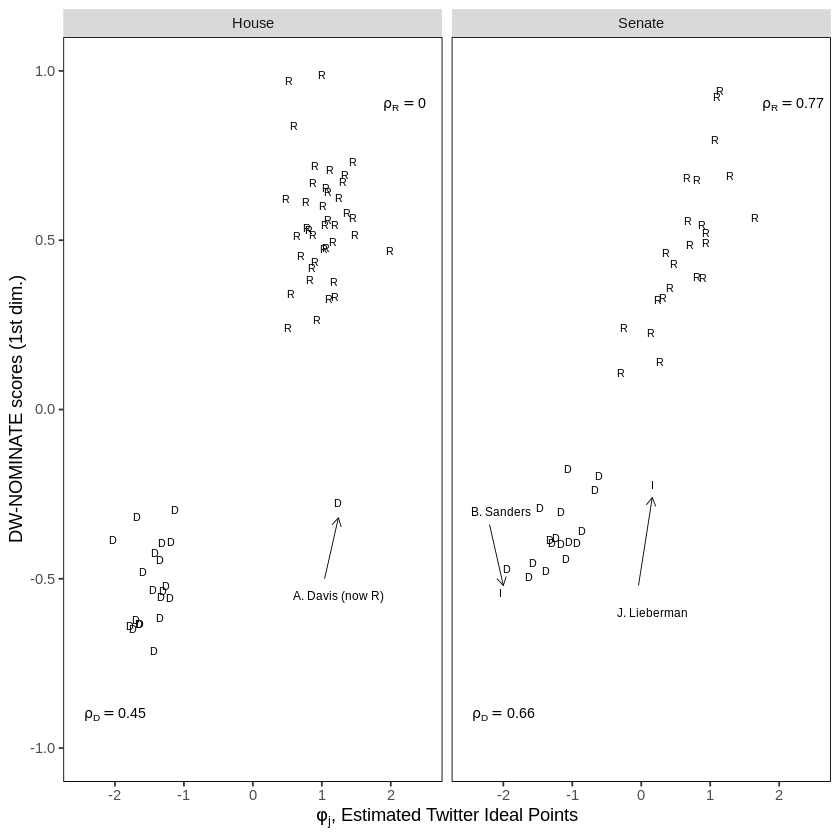

In [255]:
d <- d[!is.na(d$phi) & !is.na(d$dw.nom.1),]
# corr house dem
c1 <- round(cor(d$phi[d$title=="House" & d$party=="D"], 
    d$dw.nom.1[d$title=="House" & d$party=="D"]), 2)
# corr house R
c2 <- round(cor(d$phi[d$title=="House" & d$party=="R"], 
    d$dw.nom.1[d$title=="House" & d$party=="R"]), 2)
# corr senate D
c3 <- round(cor(d$phi[d$title=="Senate" & d$party=="D"], 
    d$dw.nom.1[d$title=="Senate" & d$party=="D"]), 2)
# corr house R
c4 <- round(cor(d$phi[d$title=="Senate" & d$party=="R"], 
    d$dw.nom.1[d$title=="Senate" & d$party=="R"]), 2)

# data frame of correlations per party per chamber
a1 <- data.frame(dw.nom.1 = -0.9, phi=-2, title=factor("House",levels=c("House","Senate")), 
            party=as.character(paste0("rho[D]==", c1)))
a2 <- data.frame(dw.nom.1 = 0.9, phi=2.2, title=factor("House",levels=c("House","Senate")), 
            party=as.character(paste0("rho[R]==", c2)))
a3 <- data.frame(dw.nom.1 = -0.9, phi=-2, title=factor("Senate",levels=c("House","Senate")), 
            party=as.character(paste0("rho[D]==", c3)))
a4 <- data.frame(dw.nom.1 = 0.9, phi=2.2, title=factor("Senate",levels=c("House","Senate")), 
            party=as.character(paste0("rho[R]==", c4)))
a <- rbind(a1, a2, a3, a4)

# data frame of specific call outs
a5 <- data.frame(dw.nom.1 = -0.55, phi=1.24, title=factor("House",levels=c("House","Senate")), 
            party="A. Davis (now R)")
a6 <- data.frame(dw.nom.1 = -0.30, phi=-2.04, title=factor("Senate",levels=c("House","Senate")),
            party="B. Sanders")
a7 <- data.frame(dw.nom.1 = -0.60, phi=.16, title=factor("Senate",levels=c("House","Senate")), 
            party="J. Lieberman")

a2 <- rbind(a5, a6, a7)

# boundaries for the plot
a8 <- data.frame(y =-0.50 , yend = -0.32, x = 1.04, xend = 1.24, party=NA, title=factor("House",levels=c("House","Senate")))
a9 <- data.frame(y =-0.34 , yend = -0.52, x = -2.2, xend = -2, party=NA, title=factor("Senate",levels=c("House","Senate")))
a10 <- data.frame(y =-0.52 , yend = -0.26, x = -.04, xend = .16, party=NA, title=factor("Senate",levels=c("House","Senate")))

a3 <- rbind(a8, a9, a10)

p <- ggplot(d, aes(y=dw.nom.1, x=phi, label=party))
pq <- p + geom_text(size=2.25) + facet_grid(. ~ title) + 
        scale_x_continuous(expression(paste(phi[j], ", Estimated Twitter Ideal Points")), limits=c(-2.5, 2.5)) +
        scale_y_continuous("DW-NOMINATE scores (1st dim.)", 
            limits=c(-1,1), breaks=seq(-1,1,.5)) +
        #scale_color_manual(name="Political Party", values=c("blue", "purple", "red")) +
        geom_text(data=a, size=3, parse=TRUE) + geom_text(data=a2, size=2.5) + 
        geom_segment(data=a3, aes(x=x, xend=xend, y=y, yend=yend), size=0.25, 
            arrow=arrow(length=unit(0.2,"cm")),show_guide=F) + 
        theme(panel.border=element_rect(fill=NA), panel.background = element_blank(), legend.position="none")
pq

In [138]:
ggsave(filename="plots/elites2.png", plot=pq, 
        height=3, width=6)

### Bilin Key Elites

In [307]:
load('bilinresults-elites-US.rdata')
load("Barbera/elites-data.Rdata")
us <- elites.data$US

rm(d)
results$merge <- tolower(results$screen_name)
# merging data
d <- merge(us, results, by="merge")

Warning message:
“Ignoring unknown parameters: width”


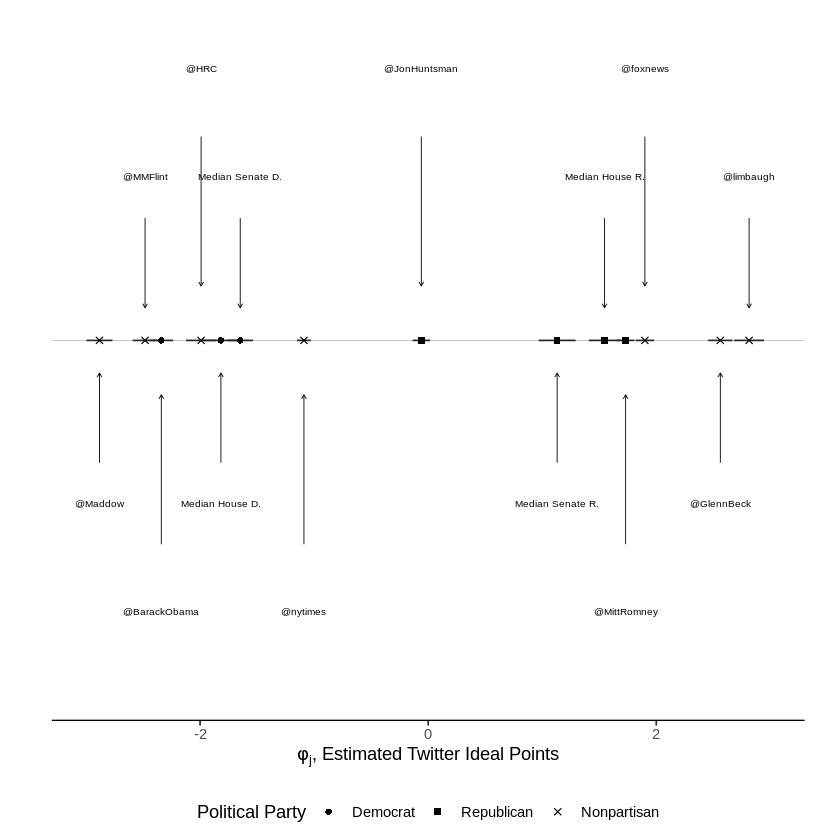

In [309]:
# finding median legislators
housedem <- median(d$phi[d$title=="House" & d$party=="D"])
houserep <- median(d$phi[d$title=="House" & d$party=="R"])
sendem <- median(d$phi[d$title=="Senate" & d$party=="D"])
senrep <- median(d$phi[d$title=="Senate" & d$party=="R"])

housedem <- which.min(abs(d$phi - housedem))
houserep <- which.min(abs(d$phi - houserep))
sendem <- which.min(abs(d$phi - sendem))
senrep <- which.min(abs(d$phi - senrep))

# preparing plot data
d <- rbind(
    d[c(housedem, houserep, sendem, senrep),],
    d[d$merge %in% c("maddow", "mmflint", "hrc", "barackobama",
        "nytimes", "jonhuntsman", "mittromney", "foxnews",
        "glennbeck", "limbaugh"),])

target <- c("Median House D.", "Median House R.", "Median Senate D.", 
            "Median Senate R.", "@BarackObama", "@foxnews", "@GlennBeck", 
            "@HRC", "@JonHuntsman", "@limbaugh", "@Maddow", "@MittRomney",
            "@MMFlint",   "@nytimes")
d2 <- data.frame(med = d$phi, lo=d$phi-2*d$phi.sd, up=d$phi+2*d$phi.sd, target=target, 
    party=c(1, 2, 1, 2, 1,
        3, 3, 3, 2, 3, 3, 
        2, 3, 3))

d2$x <- 0
d2 <- d2[order(d2$med),]

p <- ggplot(data=d2, aes(y=med, x=x, shape=factor(party)))
pq2 <- p + geom_linerange(width=.5, aes(ymin=lo, ymax=up), color="grey20") + 
        geom_point(aes(shape=factor(party))) + 
        scale_x_continuous(limits=c(-0.07,0.06), expand=c(0,0)) + 
            scale_y_continuous(expression(paste(phi[j], ", Estimated Twitter Ideal Points")), limits=c(-3, 3)) +
            theme_bw() + coord_flip() +
            scale_shape_manual(name="Political Party", values=c(16, 15, 4), 
                labels=c("Democrat",  "Republican", "Nonpartisan")) +
        theme( legend.position = "bottom", legend.direction = "horizontal",
        axis.line.y = element_blank(), 
        axis.text.y = element_blank(), 
        axis.ticks.y = element_blank(), 
        axis.title.y = element_blank(), 
        panel.border = element_blank(), 
        panel.grid = element_blank(),
        legend.spacing=unit(-0.75, "cm"),
        plot.margin=unit(c(0.30, 0.75, 0.10, 1), "cm")) +
        geom_vline(xintercept=0, alpha=1/3, size=0.2)

add <- rep_len(c(-0.03, 0.03, -0.05, 0.05), 14) 
d2$x2 <- d2$x + add

arrows <- data.frame(y = d2$med, yend = d2$med, x = add - add/4, xend = add/5, party=1)

pq2 <- pq2 + geom_text(data=d2, aes(label=target, x=x2, y=med), size=2.1) +
    geom_segment(data=arrows, aes(x=x, xend=xend, y=y, yend=yend), size=0.25,
        arrow=arrow(length=unit(0.1,"cm"))) +
    geom_vline(xintercept=-0.07, colour="black", size=0.75)

pq2 

In [300]:
ggsave(filename="plots/key_elites1.png", plot=pq2, 
        height=2, width=6)

### Orginal Key Elites

In [303]:
load('Barbera/results-elites-US.rdata')

rm(d)
results$merge <- tolower(results$screen_name)
# merging data
d <- merge(us, results, by="merge")

# subset to names also in bilin data
d <- d[d$name %in% names,]

Warning message:
“Ignoring unknown parameters: width”


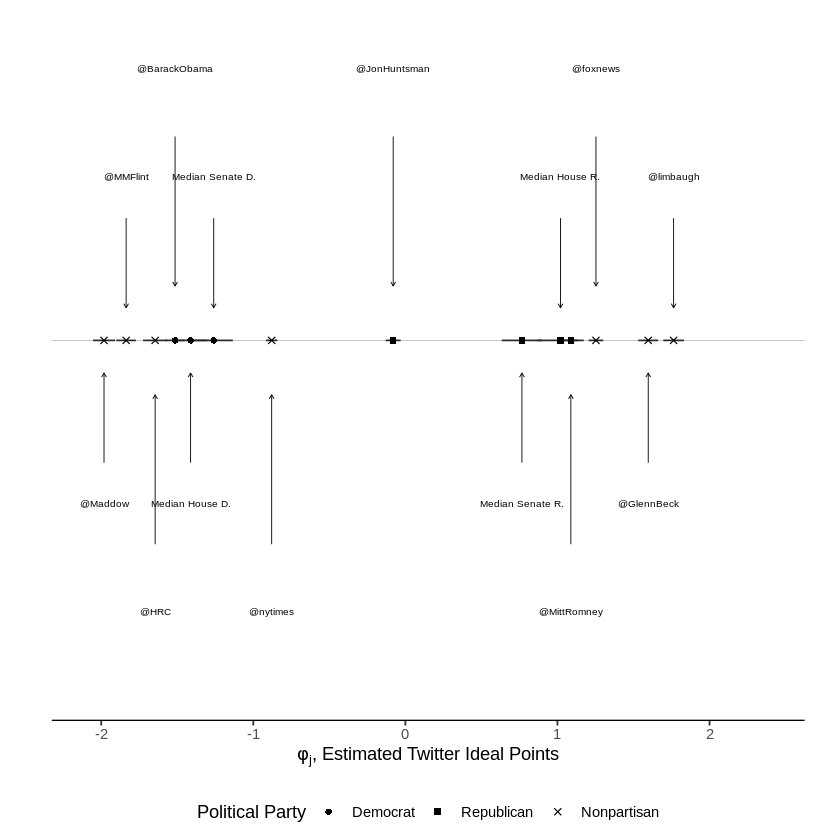

In [305]:
# finding median legislators
housedem <- median(d$phi[d$title=="House" & d$party=="D"])
houserep <- median(d$phi[d$title=="House" & d$party=="R"])
sendem <- median(d$phi[d$title=="Senate" & d$party=="D"])
senrep <- median(d$phi[d$title=="Senate" & d$party=="R"])

housedem <- which.min(abs(d$phi - housedem))
houserep <- which.min(abs(d$phi - houserep))
sendem <- which.min(abs(d$phi - sendem))
senrep <- which.min(abs(d$phi - senrep))

# preparing plot data
d <- rbind(
    d[c(housedem, houserep, sendem, senrep),],
    d[d$merge %in% c("maddow", "mmflint", "hrc", "barackobama",
        "nytimes", "jonhuntsman", "mittromney", "foxnews",
        "glennbeck", "limbaugh"),])

target <- c("Median House D.", "Median House R.", "Median Senate D.", 
            "Median Senate R.", "@BarackObama", "@foxnews", "@GlennBeck", 
            "@HRC", "@JonHuntsman", "@limbaugh", "@Maddow", "@MittRomney",
            "@MMFlint",   "@nytimes")
d2 <- data.frame(med = d$phi, lo=d$phi-2*d$phi.sd, up=d$phi+2*d$phi.sd, target=target, 
    party=c(1, 2, 1, 2, 1,
        3, 3, 3, 2, 3, 3, 
        2, 3, 3))

d2$x <- 0
d2 <- d2[order(d2$med),]

p <- ggplot(data=d2, aes(y=med, x=x, shape=factor(party)))
pq2 <- p + geom_linerange(width=.5, aes(ymin=lo, ymax=up), color="grey20") + 
        geom_point(aes(shape=factor(party))) + 
        scale_x_continuous(limits=c(-0.07,0.06), expand=c(0,0)) + 
            scale_y_continuous(expression(paste(phi[j], ", Estimated Twitter Ideal Points")), limits=c(-2.1, 2.4)) +
            theme_bw() + coord_flip() +
            scale_shape_manual(name="Political Party", values=c(16, 15, 4), 
                labels=c("Democrat",  "Republican", "Nonpartisan")) +
        theme( legend.position = "bottom", legend.direction = "horizontal",
        axis.line.y = element_blank(), 
        axis.text.y = element_blank(), 
        axis.ticks.y = element_blank(), 
        axis.title.y = element_blank(), 
        panel.border = element_blank(), 
        panel.grid = element_blank(),
        legend.spacing=unit(-0.75, "cm"),
        plot.margin=unit(c(0.30, 0.75, 0.10, 1), "cm")) +
        geom_vline(xintercept=0, alpha=1/3, size=0.2)

add <- rep_len(c(-0.03, 0.03, -0.05, 0.05), 14) 
d2$x2 <- d2$x + add

arrows <- data.frame(y = d2$med, yend = d2$med, x = add - add/4, xend = add/5, party=1)

pq2 <- pq2 + geom_text(data=d2, aes(label=target, x=x2, y=med), size=2.1) +
    geom_segment(data=arrows, aes(x=x, xend=xend, y=y, yend=yend), size=0.25,
        arrow=arrow(length=unit(0.1,"cm"))) +
    geom_vline(xintercept=-0.07, colour="black", size=0.75)

pq2 

In [306]:
ggsave(filename="plots/key_elites2.png", plot=pq2, 
        height=2, width=6)

# Elite Comparison

### Bilinear

In [498]:
load('bilinresults-elites-US.rdata')
load("Barbera/elites-data.Rdata")
us <- elites.data$US

rm(d)
results$merge <- tolower(results$screen_name)
# merging data
d <- merge(us, results, by="merge")
names <- d$name

In [513]:
# Density plot
meds <- dplyr::summarise(group_by(d, party), med = round(median(phi),2))
meds$y_pos <- c(.84, .32,.24,.8)[order(meds$med,decreasing = T)]

de1 <- ggplot(d, aes(x = phi, fill = party)) +
    geom_density(alpha = 0.5) + 
    scale_fill_manual(values=c('dodgerblue4', 'orchid4', 'grey', 'firebrick4'), name = 'Party', labels = c("D", "I", "NP", "R")) +
    ylab('Density') +
    xlab(expression(phi[j])) +
    annotate("text", x = meds$med[1], y = meds$y_pos[1], label = paste ("Median:", meds$med[1]), parse = TRUE) +
    annotate("text", x = meds$med[2], y = meds$y_pos[2], label = paste ("Median:", meds$med[2]), parse = TRUE) +
    annotate("text", x = meds$med[3], y = meds$y_pos[3], label = paste ("Median:", meds$med[3]), parse = TRUE) +
    annotate("text", x = meds$med[4], y = meds$y_pos[4], label = paste ("Median:", meds$med[4]), parse = TRUE) +
    theme(panel.border=element_rect(fill=NA), panel.background = element_blank())

ggsave(filename="plots/denselites1.png", plot=de1,
       height=5, width=5)

In [426]:
meds <- dplyr::summarise(group_by(d, party), med = round(median(phi),2))

be1 <- ggplot(d, aes(y = phi, x = party, fill = party)) + 
    xlab('Party') +
    ylab(expression(phi[j])) +
    geom_boxplot(alpha = 0.7) + 
    geom_text(data = meds, aes(y = med, label = med), 
              position = position_dodge(width = 0.8), size = 4, vjust = -0.5) +
    scale_fill_manual(values=c('dodgerblue4', 'orchid4', 'grey', 'firebrick4')) +
    theme(panel.border=element_rect(fill=NA), panel.background = element_blank())

ggsave(filename="plots/boxelites1.png", plot=be1, 
        height=5, width=5)

In [268]:
mean(d$phi[d$party=="D"])
range(d$phi[d$party=="D"])

[1] -1.710171

[1] -2.773688  1.468885

In [269]:
mean(d$phi[d$party=="R"])
range(d$phi[d$party=="R"])

[1] 1.36328

[1] -0.06040145  3.17289134

### Original

In [516]:
load('Barbera/results-elites-US.rdata')

rm(d)
results$merge <- tolower(results$screen_name)
# merging data
d <- merge(us, results, by="merge")

# subset to names also in bilin data
d <- d[d$name %in% names,]

In [515]:
# Density plot
meds <- dplyr::summarise(group_by(d, party), med = round(median(phi),2))
meds$y_pos <- c(1.27, .47,.35,1.33)[order(meds$med,decreasing = T)]

de2 <- ggplot(d, aes(x = phi, fill = party)) +
    geom_density(alpha = 0.5) + 
    scale_fill_manual(values=c('dodgerblue4', 'orchid4', 'grey', 'firebrick4'), name = 'Party', labels = c("D", "I", "NP", "R")) +
    ylab('Density') +
    xlab(expression(phi[j])) +
    annotate("text", x = meds$med[1], y = meds$y_pos[1], label = paste ("Median:", meds$med[1]), parse = TRUE) +
    annotate("text", x = meds$med[2], y = meds$y_pos[2], label = paste ("Median:", meds$med[2]), parse = TRUE) +
    annotate("text", x = meds$med[3], y = meds$y_pos[3], label = paste ("Median:", meds$med[3]), parse = TRUE) +
    annotate("text", x = meds$med[4], y = meds$y_pos[4], label = paste ("Median:", meds$med[4]), parse = TRUE) +
    theme(panel.border=element_rect(fill=NA), panel.background = element_blank())

ggsave(filename="plots/denselites2.png", plot=de2, 
        height=5, width=5)

In [477]:
# box plot
meds <- dplyr::summarise(group_by(d, party), med = round(median(phi),2))

be2 <- ggplot(d, aes(y = phi, x = party, fill = party)) + 
    xlab('Party') +
    ylab(expression(phi[j])) +
    geom_boxplot(alpha = 0.7) + 
    geom_text(data = meds, aes(y = med, label = med), 
              position = position_dodge(width = 0.8), size = 4, vjust = -0.5) +
    scale_fill_manual(values=c('dodgerblue4', 'orchid4', 'grey', 'firebrick4')) +
    theme(panel.border=element_rect(fill=NA), panel.background = element_blank())

ggsave(filename="plots/boxelites2.png", plot=be2, 
        height=5, width=5)

In [288]:
mean(d$phi[d$party=="D"])
range(d$phi[d$party=="D"])

[1] -1.322177

[1] -2.027048  1.240926

In [317]:
median(d$phi[d$party=="R"])
mean(d$phi[d$party=="R"])
range(d$phi[d$party=="R"])

[1] 0.9397727

[1] 0.8923649

[1] -0.2875427  1.9947359